# Jupyter-Notebook zu Modellanpassung

- Dieses Notebook demonstriert das Anpassen eines fachspezifischen Modells an Daten.
   - Als Beispiel dient das "velocity-command model" von Sober & Sabes (2003, 2005).
      - Das Modell macht Vorhersagen über die initiale Bewegungsrichtung einer zielgerichteten Armbewegung.
      - Das Notebook zeigt Ausschnitte des Codes für Kapitel 5 in Keyser (2021) zur Untersuchung von Armbewegungen von Schlaganfallüberlebenden.
- Für Python-Kurse soll dieses Notebook demonstrieren:
   1. Implementierung eines statistischen Modells.
   2. Interaktives Erkunden von Modellvorhersagen.
   3. Anpassen von Modellparametern an (simulierte) Daten.

## Verwendete Module

- NumPy für Matrizen und deren Manipulation
- Scipy für Optimierungsalgorithmen
- Matplotlib für Diagramme
- IPyWidgets für Interaktion mit Diagrammen
- Pandas zur Strukturierung von Daten

## Übersicht

- Probanden haben die Aufgabe, ihren Arm von einem Startpunkt zu einem Zielpunkt zu bewegen.
   - Der eigene Arm ist verdeckt, stattdessen wird ein Cursor angezeigt.
   - Der Proband nimmt die korrekte Armposition durch Propriozeption wahr.
- Der Cursor, der die Handposition repräsentiert, kann nach links oder rechts verschoben dargestellt werden.
   - Der Proband nimmt die korrekte oder veränderte Cursorposition visuell wahr.

![](figures/modelfitting/modelfitting_setup_DE.svg)

<!--
Fig. 1.
Setup and trial types.
**a**: Subject holds the handle of a robotic manipulandum (vBOT).
Visual stimuli are presented through a mirror.
A cloth prevents vision of the upper arm.
An air sled supports the lower arm.
**b**: Top view of the setup, with a virtual image of the 8 possible start and target locations (enlarged for visibility; one target is obstructed by subject's head).
In a given trial, only a single start and target was visible.
**c**: Trial types are denoted by the starting point of the hand and the cursor that could be shifted to the left or right.
-->

Abb. 1.
Aufbau und Trial-Arten.
**a**: Proband hält den Griff eines Roboter-Manipulandums (vBOT).
Visuelle Reize werden über einen Spiegel angezeigt.
Ein Tuch verhindert die Sicht auf den Oberarm.
Ein Luftschlitten unterstützt den Unterarm.
**b**: Draufsicht des Aufbaus, mit einer virtuellen Abbildung der 8 möglichen Start- und Zielorte (vergrößert für bessere Sichtbarkeit; ein Ziel ist durch den Kopf des Probanden verdeckt).
Pro Trial war nur ein einzelner Start- und ein Zielpunkt sichtbar.
**c**: Die Trial-Arten werden durch den tatsächlichen Startpunkt der Hand und den visuellen Cursor benannt, der nach links oder rechts verschoben werden konnte.

### Rohdatenbeispiel

- Durch den visuellen Verschub in Trial-Arten `CL` und `CR` wird die initiale Bewegungsrichtung der Hand systematisch verändert.
- Die Veränderungen passen zur Vermutung, dass die Bewegungsplanung besonders durch die visuelle Wahrnehmung beeinflusst wird.

![](figures/modelfitting/modelfitting_examplesubject_DE.svg)

<!-- ENGLISH
Fig. 2.
Reach traces in workspace coordinates from one example subject (control subject 05)
Columns are organized into trial types Center-Left (CL), Center-Zero (C0) and Center-Right (CR).
Closed circles denote the target locations, open circles denote the visual start location.
Lines represent hand traces of individual trials.
-->
Abb. 2.
Bewegungstrajektorien in Arbeitsbereich-Koordinaten von einem Beispielprobanden (Kontrollproband 05).
Spalten sind nach Trial-Arten geordnet: Center-Links (CL), Center-Null (C0) und Center-Rechts (CR).
Geschlossene Kreise markieren die Zielorte, offene Kreise markieren die visuellen Startorte.
Linien repräsentieren die Handtrajektorien einzelner Trials.

### Beispiel extrahierter Richtungsfehler

- Aus den Bewegungsdaten werden die initialen Richtungsfehler extrahiert, die durch den visuellen Verschub des Cursors entstehen (Abb. 3b).
- Fehler werden relativ zur mittleren Bewegungsrichtung von `C0`-Trials berechnet.

![](figures/modelfitting/modelfitting_examplesubject_errors_DE.svg)

<!-- ENGLISH
Fig. 3.
**a**: Schematic view of the coordinate system.
**b**: Example of initial reach errors and model fits from control subject 05.
Negative and positive values indicate clockwise (cw) and counter-clockwise (ccw) errors, respectively.
Triangles indicate initial reach errors of single trials.
-->
Abb. 3.
**a**: Schematische Ansicht des Koordinatensystems.
**b**: Beispiel für initiale Bewegungsfehler und Modellanpassungen von Kontrollproband 05.
Negative und positive Werte indizieren im Uhrzeigersinn und gegen den Uhrzeigersinn gerichtete Fehler.
Dreiecke zeigen initiale Bewegungsfehler einzelner Trials.

### Modell-Anpassung

- Das Modell macht Vorhersagen über die initialen Richtungsfehler der Zielbewegungen.
- Die Modellparameter werden durch Anpassung an die Daten ermittelt.
   - Die Parameter heißen $\alpha_{MV}$ und $\alpha_{INV}$, und geben an, wieviel Gewichtung auf visuelle Wahrnehmung bzw. Propriozeption gelegt wird.
   - Die Anpassung erfolgt durch Minimierung der quadratischen Abweichung zwischen Modellvorhersage und den Daten, mithilfe des Moduls `scipy.optimize` und dem Algorithmus L-BFGS-B (Zhu et al., 1997).

![](figures/modelfitting/modelfitting_fitted_weights_DE.svg)

<!-- ENGLISH
Fig. 4.
**a**: Initial reach errors of the example subject (control subject 05) from Fig. 3b.
Solid lines indicate the best fit parameters of the velocity command model.
Shaded areas indicate the boundaries around 95% of the bootstrapped model parameters.
The best fit parameters were $\alpha_{MV} = 0.90$ and $\alpha_{INV} = 0.38$.
**b**: Fitted weighting parameters from the velocity command model.
Dots represent the best-fit weighting parameters ($\alpha_{MV} and $\alpha_{INV}), and ellipses denote 1 SD of bootstrapped values.
Numbers denote the subject number.
-->
Abb. 4.
**a**: Initiale Richtungsfehler des Beispielprobanden (Kontrollproband 05) aus Abb. 3b.
Dreiecke zeigen initiale Bewegungsfehler einzelner Trials.
Durchgezogene Linien zeigen die am besten passenden Modellparameter des Geschwindigkeitsbefehlsmodells.
Schattierte Bereiche zeigen die Grenzen um 95% der gebootstrappten Modellparameter.
Die am besten passenden Parameter waren $\alpha_{MV} = 0.90$ und $\alpha_{INV} = 0.38$.
**b**: Anpassung der Gewichtungsparameter aus dem Geschwindigkeitsbefehlsmodell.
Punkte repräsentieren die am besten passenden Gewichtungsparameter ($\alpha_{MV}$ und $\alpha_{INV}$), und Ellipsen zeigen 1 SD der gebootstrappten Werte.
Zahlen geben die Probandennummer an.

# Modellübersicht


- Das Modell berechnet die Cursorposition als gewichtete Summe
   - der propriozeptiv wahrgenommenen Handposition $\hat{x}_{prop}$,
   - und der visuell wahrgenommenen Hand/Cursorposition $\hat{x}_{vis}$.
   - Die einzigen Modellparameter sind die Gewichte $\alpha_{MV}$ und $\alpha_{INV}$, die zwischen 0 und 1 liegen dürfen.

![](figures/modelfitting/modelfitting_model_schematic_DE.svg){width=50%}
<!--
Schematic of the velocity command model by Sober & Sabes (2003).
The model first determines a planned Movement Vector (`MV` stage) that is then used to generate a joint-based motor command based on an inverse model of the arm (`INV` stage).
Both stages use their own weighting parameter ($\alpha_{\mathrm{MV}}$ and $\alpha_{\mathrm{INV}}$) of vision and proprioception ($\hat{x}_{\mathrm{vis}}$ and $\hat{x}_{\mathrm{prop}}$) to arrive at an estimate of the initial hand location ($\hat{x}_{\mathrm{MV}}$ and $\hat{x}_{\mathrm{INV}}$).
-->
Schema des "velocity-command"-Modells von Sober & Sabes (2003).
Das Modell bestimmt zunächst einen geplanten Movement-Vektor (`MV`-Stufe), der anschließend verwendet wird, um einen gelenkbasiertes Motorkommando zu erzeugen, der auf einem inversen Modell des Arms basiert (`INV`-Stufe).
Beide Stufen verwenden ihren eigenen Gewichtungsparameter ($\alpha_{\mathrm{MV}}$ und $\alpha_{\mathrm{INV}}$) von visueller und propriozeptiver Wahrnehmung ($\hat{x}_{\mathrm{vis}}$ und $\hat{x}_{\mathrm{prop}}$), um eine Schätzung der Handposition zu erhalten ($\hat{x}_{\mathrm{MV}}$ und $\hat{x}_{\mathrm{INV}}$).

<!--
![](figures/modelfitting_model_error_drawing_DE.svg){width=50%}
-->

## Modell-Notation und Zutaten

![](figures/modelfitting/modelfitting_model-notation_DE.svg)

<!-- ENGLISH
The model assumes that the CNS weights the visual ($\hat{x}_{vis}$) and proprioceptive ($\hat{x}_{prop}$) position estimates and adds them to create two estimates of the position of the arm, $\hat{x}_{MV}$ ("movement vector") and $\hat{x}_{INV}$ ("inverse model"):
-->

Das Modell nimmt an, dass das ZNS die visuellen ($\hat{x}_{vis}$) und propriozeptiven ($\hat{x}_{prop}$) Positionsschätzungen der Hand gewichtet und sie addiert, um zwei Schätzungen der Position des Arms zu erstellen, $\hat{x}_{MV}$ ("Movement-Vektor") und $\hat{x}_{INV}$ ("inverses Modell"):

$$\hat{x}_{MV} = \alpha_{MV} \hat{x}_{vis} + (1-\alpha_{MV})\hat{x}_{prop} \\
\hat{x}_{INV} = \alpha_{INV} \hat{x}_{vis} + (1-\alpha_{INV})\hat{x}_{prop}.$$

<!-- ENGLISH
The planned movement vector's *angle* is defined as the desired initial velocity of the hand ($\dot{x}^*$).
The direction of this velocity is specified by:
$$\measuredangle \dot{x}^* = \measuredangle(x^*_d - \hat{x}_{MV}) + \omega_d,$$
where $\measuredangle x$ represents the angle of vector $x$, and $x^*_d$ represents the location of target $d\in \left[1,...,8\right]$, and $\hat{x}_{MV}$ is the estimated hand position defined above.
The terms $\omega_d$ account for the fact that natural, unperturbed reaching movements are often slightly curved.
-->

Der geplante Movement-Vektor wird durch die gewünschte Anfangsgeschwindigkeit der Hand ($\dot{x}^*$) definiert.
Die Richtung dieser Geschwindigkeit wird durch folgende Gleichung angegeben:
$$\measuredangle \dot{x}^* = \measuredangle(x^*_d - \hat{x}_{MV}) + \omega_d,$$
wobei $\measuredangle x$ den Winkel des Vektors $x$ repräsentiert, und $x^*_d$ die Position des Ziels $d\in \left[1,...,8\right]$ repräsentiert, und $\hat{x}_{MV}$ die oben definierte geschätzte Handposition ist.
Die Terme $\omega_d$ berücksichtigen die Tatsache, dass natürliche Zielbewegungen oft leicht gekrümmt sind.

<!-- ENGLISH
The desired hand velocity $\dot{x}^*$ is then used to compute the motor command, specified as a vector of joint angle velocities $\dot{\theta}$:
$$\dot{\theta} = J^{-1}(\hat{\theta}_{INV})\dot{x}^*,$$
where $\hat{\theta}_{INV} = K^{-1}(\hat{x}_{INV})$ is calculated from the (correct) inverse kinematics function $K^{-1}$.
The Jacobian matrix $J(\theta)$ is the gradient of the hand location w.r.t. the joint angles $J(\theta) = \nabla_{\theta} K(\theta) = \frac{dx}{d\theta}$.

The resulting arm velocity is a function of the subject's internally estimated arm angles $\hat{\theta}_{INV}$ and of the desired velocity $\dot{x}^*$.
Note that $J()$ is evaluated using the actual arm angles $\theta$:

$$\dot{x} = J(\theta)\dot{\theta} = J(\theta)J^{-1}(\hat{\theta}_{INV})\dot{x}^*$$
-->

Die gewünschte Handgeschwindigkeit $\dot{x}^*$ wird dann verwendet, um das Motorkommando zu berechnen, das als Vektor von Gelenkwinkelgeschwindigkeiten $\dot{\theta}$ angegeben ist:
$$\dot{\theta} = J^{-1}(\hat{\theta}_{INV})\dot{x}^*,$$
wobei $\hat{\theta}_{INV} = K^{-1}(\hat{x}_{INV})$ aus der (korrekten) inversen Kinematikfunktion $K^{-1}$ berechnet wird.
Die Jacobi-Matrix $J(\theta)$ ist der Gradient der Handposition bezüglich der Gelenkwinkel $J(\theta) = \nabla_{\theta} K(\theta) = \frac{dx}{d\theta}$.

Die resultierende Armbewegungsgeschwindigkeit ist eine Funktion der vom Probanden intern geschätzten Armwinkel $\hat{\theta}_{INV}$ und der gewünschten Geschwindigkeit $\dot{x}^*$.
Beachten Sie, dass $J()$ unter Verwendung der tatsächlichen Armwinkel $\theta$ ausgewertet wird:

$$\dot{x} = J(\theta)\dot{\theta} = J(\theta)J^{-1}(\hat{\theta}_{INV})\dot{x}^*$$

<!-- ENGLISH
This model predicts that the initial velocity $\dot{x}$ will be distorted from the desired velocity $\dot{x}^*$ if the arm position (and thus angles) is misestimated.
The "velocity distortion matrix" $D_{vel}(\theta, \hat{\theta}_{INV}) = J(\theta)J^{-1}(\hat{\theta}_{INV})$ determines the INV error.
Note how this matrix is the Identity matrix only if $\hat{\theta}_{INV} = \theta$.
-->

Dieses Modell sagt voraus, dass die Anfangsgeschwindigkeit $\dot{x}$ von der gewünschten Geschwindigkeit $\dot{x}^*$ abweicht, wenn die Armposition (und damit deren Gelenkwinkel) falsch eingeschätzt wird.
Die "Geschwindigkeitsverzerrungsmatrix" $D_{vel}(\theta, \hat{\theta}_{INV}) = J(\theta)J^{-1}(\hat{\theta}_{INV})$ bestimmt den INV-Fehler.
Beachten Sie, dass diese Matrix nur dann die Einheitsmatrix ist, wenn $\hat{\theta}_{INV} = \theta$ gilt.

<!--### Details not mentioned, but needed for implementation -->
### Details für die Implementierung

<!-- ENGLISH
Sober & Sabes follow the same angle convention as [this wikibooks example](https://en.wikibooks.org/wiki/Robotics_Kinematics_and_Dynamics/Serial_Manipulator_Differential_Kinematics#Example:_The_Two-Link_Planar_Manipulator_2).

The kinematics equation $\mathbf{{x}} = K(\theta)$ describes the mapping from joint angles to hand location.
-->

Sobers & Sabes verwenden die gleiche Winkelkonvention wie [dieses Beispiel in Wikibooks](https://en.wikibooks.org/wiki/Robotics_Kinematics_and_Dynamics/Serial_Manipulator_Differential_Kinematics#Example:_The_Two-Link_Planar_Manipulator_2).

Die Kinematikgleichung $\mathbf{{x}} = K(\theta)$ beschreibt die Zuordnung von Gelenkwinkeln zu Handpositionen.

$(x_1, x_2) = K(\theta_1,\theta_2) =
\begin{pmatrix}
L_1\cos(\theta_1) + L_2\cos(\theta_1 + \theta_2) \\
L_1\sin(\theta_1) + L_2\sin(\theta_1 + \theta_2)
\end{pmatrix}$

<!-- ENGLISH
The corresponding inverse kinematics used are [formulated here](http://www.hessmer.org/uploads/RobotArm/Inverse%2520Kinematics%2520for%2520Robot%2520Arm.pdf).
For the right arm, the positive solution is the correct one, for the left, the negative:
-->

Die entsprechende inverse Kinematik, die hier verwendet wird, ist [hier formuliert](http://www.hessmer.org/uploads/RobotArm/Inverse%2520Kinematics%2520for%2520Robot%2520Arm.pdf).
Für den rechten Arm ist die positive Lösung die richtige, für den linken die negative:

$$\theta_2 = \mathrm{atan2}\left(\pm\sqrt{1-\left(\frac{x_1^2+x_2^2-L_1^2-L_2^2}{2 L_1 L_2}\right)^2},\frac{x_1^2+x_2^2-L_1^2-L_2^2}{2 L_1 L_2}\right)$$

$$\theta_1 = \mathrm{atan2}(x_2, x_1) - \mathrm{atan2}(k_2,k_1),$$

<!-- ENGLISH
where $k_1 = L_1+L_2\cos(\theta_2)$, and $k_2 = L_2\sin(\theta_2)$.

For the formulation above, the Jacobian takes this form:
-->
wobei $k_1 = L_1+L_2\cos(\theta_2)$ und $k_2 = L_2\sin(\theta_2)$.

Für die obige Formulierung hat die Jacobi-Matrix folgende Form:

$J(\theta) = 
\begin{pmatrix}
-L_1 \sin(\theta_1) - L_2 \sin(\theta_1 + \theta_2) & -L_2 \sin(\theta_1 + \theta_2) \\
 L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) & L_2 \cos(\theta_1 + \theta_2)
\end{pmatrix}$

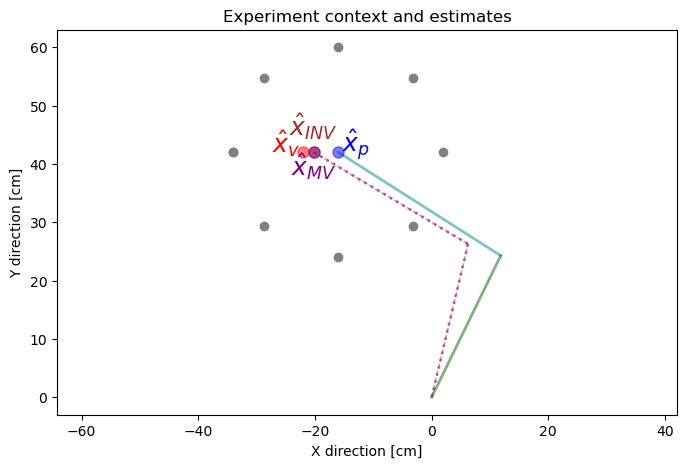

In [2]:
# Now the model implementation in Python.
%matplotlib inline
from numpy.linalg import inv
from matplotlib.pyplot import figure, subplot, gca, axis, plot, title,\
                              ylabel, xlabel, xlim, ylim, xticks, text,\
                              tight_layout
from matplotlib.patches import Ellipse
from numpy.random import normal as npRandn
from numpy import cos, sin, arctan2, matrix, array, pi, \
                  mod, sign, sqrt, square, deg2rad, rad2deg,\
                  isscalar, linspace, empty, nan

# Functions to compute forward/inverse Kinematics and Jacobian.
# Note the model assumes perfect knowledge of L1, L2 and of K, iK and J.
#
# Note the use of variables defined outside of the functions' scope,
# which is not good practice, but simplifies the code for this example.

# Functions to compute forward/inverse Kinematics and Jacobian.
# (Note the model assumes perfect knowledge of L1,L2 and of K, iK and J.)
def K(th1, th2, L1=30, L2=30):
    """Forward kinematics: joint angles => x, assuming shoulder at (0,0)."""
    return array(((L1*cos(th1) + L2*cos(th1+th2)),
                  (L1*sin(th1) + L2*sin(th1+th2))))


def iK(xx1, xx2, L1=30, L2=30, ArmSign=+1):
    """
    Inverse kinematics: From x => joint angles, assuming shoulder at (0,0).
    ArmSign = -1 indicates left arm, ArmSign = +1 indicates right arm.
    """
    arg_b = (square(xx1) + square(xx2) - square(L1) - square(L2)) / (2*L1*L2)
    arg_a = ArmSign*sqrt(1-square(arg_b))
    th1 = arctan2(arg_a, arg_b)
    kk1 = L1+L2*cos(th1)
    kk2 = L2*sin(th1)
    th0 = arctan2(xx2, xx1) - arctan2(kk2, kk1)
    theta = (th0, th1)
    theta = array(theta).flatten()
    return theta


def J(th1, th2, L1=30, L2=30):
    """
    Jacobian matrix, i.e. the partial derivatives of the forward kinematics,
    w.r.t arm angles th1 and th2 (well defined in the same way for both arms).
    """
    return matrix(((-L1*sin(th1)-L2*sin(th1+th2), -L2*sin(th1+th2)),
                   (+L1*cos(th1)+L2*cos(th1+th2), +L2*cos(th1+th2))))


### Subject's parameters and resulting estimates
L1 = 27  # subject's upper arm length
L2 = 33  # subject's lower arm length
# Experimental context: Let's define that the subject's shoulder is at (0,0),
# and the center of the 18 cm diameter target ring at (-10,40).
tgtOrigin = (-16, 42)

true_th = iK(tgtOrigin[0], tgtOrigin[1], L1=L1, L2=L2)
x_prop = matrix((tgtOrigin[0], tgtOrigin[1])).T
x_vis = matrix((tgtOrigin[0]-6, tgtOrigin[1])).T

### plot the modeled experimental context
def plotExpContext(tgtRad=18, x_vis=x_vis, axs=None, a_MV=0.7, a_INV=0.7):
    """
    Plot the experimental context, with the subject's arm and the two
    estimates of the hand location.
    """
    x_MV  = a_MV *x_vis + (1 - a_MV )*x_prop
    x_INV = a_INV*x_vis + (1 - a_INV)*x_prop
    th_real = iK(x_prop[0], x_prop[1], L1, L2)  # actual arm angles theta
    th_INV = iK(x_INV[0], x_INV[1])  # INV's estimated arm angles
    th_MV = iK(x_MV[0], x_MV[1])   # MV's estimated arm angles
    # plot actual arm configuration
    elbow_real = (L1*cos(th_real[0]), L1*sin(th_real[0]))
    plot((0,elbow_real[0]), (0,elbow_real[1]), '-', color='darkgreen', lw=2, alpha=.5)
    plot((elbow_real[0],x_prop[0]), (elbow_real[1],x_prop[1]), '-', color='darkcyan',  lw=2, alpha=.5)
    # plot INV-estimated arm configuration and endpoint
    elbow_INV = (L1*cos(th_INV[0]), L1*sin(th_INV[0]))
    plot((0,elbow_INV[0]), (0,elbow_INV[1]), '--', color='brown', lw=1, alpha=.5)
    plot((elbow_INV[0],x_INV[0]), (elbow_INV[1],x_INV[1]), '--', color='brown', lw=1, alpha=.5)
    plot(x_INV[0], x_INV[1], 'o', markersize=8, color='brown', alpha=.5)
    text(x_INV[0], x_INV[1]+3, '$  \hat{x}_{INV}$', color='brown', fontsize=18, ha='center')
    # plot MV-estimated arm configuration and endpoint
    elbow_MV = (L1*cos(th_MV[0]), L1*sin(th_MV[0]))
    plot((0,elbow_MV[0]), (0,elbow_MV[1]), ':', color='purple', lw=2, alpha=.5)
    plot((elbow_MV[0],x_MV[0]), (elbow_MV[1],x_MV[1]), ':', color='purple', lw=2, alpha=.5)
    plot(x_MV[0], x_MV[1], 'o', markersize=8, color='purple', alpha=.5)
    text(x_MV[0], x_MV[1]-4, '$  \hat{x}_{MV}$', color='purple', fontsize=18, ha='center')
    # plot presented visual and (unbiased) proprioceptive sensation
    addP = +3; addV = -3 # put labels on correct side
    if x_prop[0] < x_vis[0]:
        addP = -3; addV = +3
    plot(x_prop[0], x_prop[1], 'o', markersize=8, color='b', alpha=.5)
    plot(x_vis[0], x_vis[1], 'o', markersize=8, color='r', alpha=.5)
    text(x_prop[0]+addP, x_prop[1], '$\hat{x}_{p}$', color='b', fontsize=18, ha='center')
    text(x_vis[0]+addV,  x_vis[1], '$\hat{x}_{v}$', color='r', fontsize=18, ha='center')
    if axs is None:
        axs = gca()
    # draw subject's body and head
    axs.add_artist(Ellipse(xy=(-15,0), width=40, height=15, facecolor='white'))
    axs.add_artist(Ellipse(xy=(-15,0), width=15, height=20, facecolor='white'))
    # plot the eight target directions
    tgtDirs = linspace(-pi, pi, 8+1)
    for tgtDir in tgtDirs:
        tgtX = tgtOrigin[0] + tgtRad*cos(tgtDir)
        tgtY = tgtOrigin[1] + tgtRad*sin(tgtDir)
        plot(tgtX, tgtY, 'o', color='gray')
    axis('equal')
    title('Experiment context and estimates')
    xlabel('X direction [cm]'), ylabel('Y direction [cm]')


### VELOCITY MODEL
def veloModel(a_MV=0, a_INV=0, x_vis=x_vis, tgtRad=18):
    # Eq. (1) and (2), compute two subjective estimates of hand location
    x_MV = a_MV*x_vis + (1 - a_MV)*x_prop
    x_INV = a_INV*x_vis + (1 - a_INV)*x_prop
    tgtDirs = linspace(-pi+0.2, pi-0.2, 50)
    tgtErrs = empty(tgtDirs.shape)*nan
    for tt,tgtDir in enumerate(tgtDirs):
        # target location
        tgtX1 = tgtOrigin[0] + tgtRad*cos(tgtDir)
        tgtX2 = tgtOrigin[1] + tgtRad*sin(tgtDir)
        tgtVec = matrix((tgtX1, tgtX2)).T
        subj_th = iK(x_INV[0], x_INV[1], L1=L1, L2=L2) # inverse kinematics
        # Eq. (3), compute desired velocity vector (later, only angle is used)
        x_dot_wish = tgtVec - x_MV + 0
        # Eq. (5), compute the actually resulting movement direction
        j_true = J(true_th[0], true_th[1], L1=L1, L2=L2)
        j_subj = J(subj_th[0], subj_th[1], L1=L1, L2=L2)
        x_dot_done = (j_true*inv(j_subj)) * matrix(x_dot_wish)
        x_dot_done_dir = arctan2(x_dot_done[1], x_dot_done[0])
        tgtErrs[tt] = x_dot_done_dir - tgtDir
    return (tgtDirs, tgtErrs)


def plotModel(a_MV=0, a_INV=0, x_vis=x_vis, tgtRad=18, color='gray'):
    result = veloModel(a_MV, a_INV, x_vis=x_vis, tgtRad=tgtRad)
    plot(rad2deg(result[0]), rad2deg(result[1]), '-', lw=2, color=color)
    plot((-180,180),(0,0), 'k:', lw=2)
    xlim((-180,180)), ylim((-20,20))
    xticks(linspace(-180, 180, 8+1))

### plot the arm configuration and all targets
figure(figsize=(8,5))
plotExpContext();


# Interaktive Modellvorhersage

- In der folgenden Zelle kann die Modellvorhersage für verschiedene Parameterwerte interaktiv erkundet werden.
- Zur Erinnerung:
  - $\hat{x}_{MV}$ ist die geschätzte Handposition für den Movement-Vektor.
  - $\hat{x}_{INV}$ ist die geschätzte Handposition für das gelenkbasierte Motorkommado.
  - Beide Schätzungen sind gewichtete Summen aus der visuellen Handposition $\hat{x}_{vis}$ und der propriozeptiven Handposition $\hat{x}_{prop}$, mit den Gewichten $\alpha_{MV}$ bzw. $\alpha_{INV}$.
    - $\color{purple}{\hat{x}_{MV}} = \alpha_{MV} \color{red}{\hat{x}_{vis}} + (1-\alpha_{MV})\color{blue}{\hat{x}_{prop}}$
    - $\color{brown}{\hat{x}_{INV}} = \alpha_{INV} \color{red}{\hat{x}_{vis}} + (1-\alpha_{INV})\color{blue}{\hat{x}_{prop}}$

In [3]:
from ipywidgets import interact
from ipywidgets.widgets import FloatSlider, IntSlider
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

def interactModel(a_MV=0, a_INV=0, visShift=6, tgtRad=12):
    x_vis = matrix((tgtOrigin[0]+visShift, tgtOrigin[1])).T
    figure(figsize=(12, 5))
    subplot(1, 2, 2)
    plotModel(a_MV, a_INV, x_vis, tgtRad)
    xlabel('target direction [deg]')
    ylabel('shift-induced error [deg]')
    title('Model prediction')
    subplot(1,2,1)
    plotExpContext(x_vis=x_vis, a_MV=a_MV, a_INV=a_INV, tgtRad=tgtRad)
    xlim(-35,25)
    subplot(1,2,2)
    ylim(-40,40)

interact(interactModel,
         a_MV  = FloatSlider(min=0, max=1,  step=0.1, value=0),
         a_INV = FloatSlider(min=0, max=1,  step=0.1, value=1),
         visShift = IntSlider(min=-7, max=+7, step=1, value=6),
         tgtRad = IntSlider(min=10, max=18, step=1, value=12));

interactive(children=(FloatSlider(value=0.0, description='a_MV', max=1.0), FloatSlider(value=1.0, description=…

# Simulation von Daten anhand des Modells

- In der folgenden Zelle wird das Modell verwendet, um Daten zu simulieren.
- Die Simulation erzeugt Daten, die normalverteilte Fehler in visueller und propriozeptiver Wahrnehmung enthalten.
   - Dies ist eine Vereinfachung, aber nützlich genug, um anschließend die Modellanpassung zu demonstrieren.

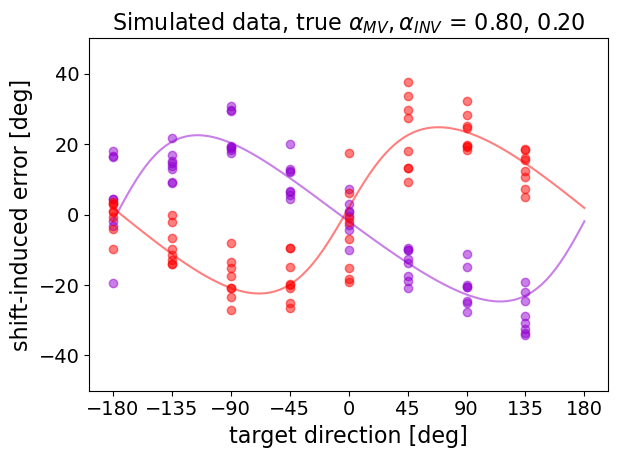

In [8]:
# Simulation of Data, based on the velocity command model.

## First, import and define more helper functions.
import pandas as pd
from numpy import concatenate, tile, unique, zeros

# Define default colors and alpha values for plotting different trial types.
Color = {'C0': 'grey', 'CL': 'darkviolet', 'CR': 'red',
         'L0': 'violet', 'R0': 'lightred', 'out': 'black'}
Alpha = {'C0': 0.7, 'CL': 0.7, 'CR': 0.7,
         'L0': 0.7, 'R0': 0.7, 'out': 1.0}

# Lookup dictionary for trial types to visual shifts.
Ttype2VisShift = {'CL': array((-6, 0)), 'CR': array((+6, 0))}


def chooseSmallerAngle(angle):
    """
    Chooses the smallest absolute value to express an angle. For e.g. angular
    errors, it's handy to express them as the minimal deviation from 0.
    """
    abs_angle = abs(angle)
    if abs_angle <= pi:  # already smallest expressible angle
        return angle
    else:
        two_pi = 2*pi
        if abs_angle >= two_pi:  # make sure range is 0 <= angle <= 2*pi
            sign_angle = sign(angle)
            angle = mod(angle, two_pi)*sign_angle
        if angle > pi:
            angle = -(two_pi - angle)
        elif angle < -pi:
            angle = two_pi - abs_angle
    return angle


def chooseSmallerAngles(angles):
    """Generalize chooseSmallerAngle() to an array of angles."""
    angles = array(angles)

    for aa, _ in enumerate(angles):
        angles[aa] = chooseSmallerAngle(angles[aa])

    return angles


def justVeloModelErr(a_MV=0.7, a_INV=0.7,
                     visShift=array((-6, 0)), tgtDir=0, tgtRad=12,
                     tgtOrigin=array((-15, 40)), L1=30, L2=30, ArmSign=+1):
    """
    Velocity Model of Sober & Sabes (2003, 2005), calculate predicted errors.
    Note that 'tgtOrigin' is the hand's actual start location; it was called
    'target origin' because it's the origin of the target circle.
    Note the calculations are done with shoulder assumed at coordinates (0, 0).
    """
    assert not isscalar(visShift) and len(visShift) == 2, \
        "visShift must be a 2D array!"  # prevent my own mistake in the future -_-
    x_prop = tgtOrigin  # proprioception is unbiased
    x_vis = tgtOrigin + visShift  # vision is fooled by visual shift
    # Eq. (1) and (2), compute two subjective estimates of hand location
    x_mv = a_MV*x_vis + (1 - a_MV)*x_prop
    x_inv = a_INV*x_vis + (1 - a_INV)*x_prop
    # target location
    tgtVec = array((tgtOrigin[0] + tgtRad*cos(tgtDir),
                    tgtOrigin[1] + tgtRad*sin(tgtDir)))
    subj_th = iK(x_inv[0], x_inv[1], L1=L1, L2=L2, ArmSign=ArmSign)  # inv kin
    # print("subj_th = ", end='')
    # print(subj_th)
    # Eq. (3), compute desired velocity vector (later, only angle is used)
    x_dot_wish = tgtVec - x_mv + 0
    # Eq. (5), compute the actually resulting movement direction
    true_th = iK(tgtOrigin[0], tgtOrigin[1], L1=L1, L2=L2, ArmSign=ArmSign)
    j_true = J(true_th[0], true_th[1], L1=L1, L2=L2)
    j_subj = J(subj_th[0], subj_th[1], L1=L1, L2=L2)
    # print("j_true = ", end='')
    # print(j_true)
    x_dot_done = (j_true*inv(j_subj))*matrix(x_dot_wish).T
    x_dot_done_dir = arctan2(x_dot_done[1], x_dot_done[0])
    tgt_err = x_dot_done_dir - tgtDir
    return tgt_err


def veloModelErrSensorNoise(a_MV=0.7, a_INV=0.7,
                            visShift=array((-6, 0)), tgtDir=0, tgtRad=12,
                            tgtOrigin=array((-15, 40)), L1=30, L2=30,
                            visualNoiseCm=1, jointNoiseDeg=1, ArmSign=+1):
    """Velocity model, with Gaussian noise on vision and joint angles."""
    x_prop = tgtOrigin  # proprioception is unbiased, noise added below
    x_vis = tgtOrigin + visShift  # vision is fooled by visual shift
    # add uncorrelated(!) Gaussian noise to vision in Euclidean space [cm]
    x_vis = x_vis + npRandn(loc=0, scale=visualNoiseCm, size=2)
    # add uncorrelated Gaussian noise to joints (in Joint space) [deg]
    th_prop = iK(x_prop[0], x_prop[1], L1=L1, L2=L2, ArmSign=ArmSign)
    th_prop = th_prop + npRandn(loc=0, scale=deg2rad(jointNoiseDeg), size=2)
    x_prop = K(th_prop[0], th_prop[1], L1=L1, L2=L2)  # fwd kinematics
    # Eq. (1) and (2), compute two subjective estimates of hand location
    x_MV = a_MV*x_vis + (1 - a_MV)*x_prop
    x_INV = a_INV*x_vis + (1 - a_INV)*x_prop
    # target location
    tgtVec = array((tgtOrigin[0] + tgtRad*cos(tgtDir),
                    tgtOrigin[1] + tgtRad*sin(tgtDir)))
    subj_th = iK(x_INV[0], x_INV[1], L1=L1, L2=L2, ArmSign=ArmSign)
    # Eq. (3), compute desired velocity vector (later, only angle is used)
    x_dot_wish = tgtVec - x_MV + 0
    # Eq. (5), compute the actually resulting movement direction
    true_th = iK(tgtOrigin[0], tgtOrigin[1], L1=L1, L2=L2, ArmSign=ArmSign)
    J_true = J(true_th[0], true_th[1], L1=L1, L2=L2)
    J_subj = J(subj_th[0], subj_th[1], L1=L1, L2=L2)
    x_dot_done = (J_true*inv(J_subj))*matrix(x_dot_wish).T
    x_dot_done_dir = arctan2(x_dot_done[1], x_dot_done[0])
    tgtErr = x_dot_done_dir - tgtDir
    return tgtErr


def fakeDataSensorNoise(a_MV=0.5, a_INV=0.5,
                        tgtDirs=deg2rad(array([-180, -90, -60, 0, +90, +150])),
                        nRep=8, tgtRad=12,
                        L1=30, L2=30, ShoulderPos=array((15, -40)), ArmSign=+1,
                        visualNoiseCm=1, jointNoiseDeg=1):
    """Generates fake data by adding Gaussian noise to vision & joint angles"""
    dfs = []
    for ttype in ['CL', 'CR']:
        visShift = Ttype2VisShift[ttype]
        allTgtDirs = []
        allTrlErrs = []
        for tt, tgtDir in enumerate(tgtDirs):
            trlErrs = [veloModelErrSensorNoise(a_MV=a_MV, a_INV=a_INV,
                                               visShift=visShift,
                                               tgtDir=tgtDir,
                                               tgtRad=tgtRad,
                                               L1=L1, L2=L2,
                                               tgtOrigin=-ShoulderPos,
                                               visualNoiseCm=visualNoiseCm,
                                               jointNoiseDeg=jointNoiseDeg,
                                               ArmSign=ArmSign)
                       for _ in range(nRep)]
            trlErrs = concatenate(trlErrs)
            trlErrs = chooseSmallerAngles(trlErrs)
            allTrlErrs.append(trlErrs)
            allTgtDirs.append(tile(tgtDir, (nRep, 1)))
        allTrlErrs = array(allTrlErrs).flatten()
        allTgtDirs = array(allTgtDirs).flatten()
        df = pd.DataFrame({'subject': 'fakeSubj',
                           'ttype': ttype,
                           'trgtRads': allTgtDirs,
                           'trgtDegs': rad2deg(allTgtDirs),
                           'errRads': allTrlErrs})
        dfs.append(df)
    fakeDF = pd.concat(dfs)
    fakeDF = fakeDF.set_index(['subject', 'ttype', 'trgtDegs'])
    fakeDF = fakeDF.sort_index()
    return fakeDF


def plotVeloModelFun(a_MV=0, a_INV=0, visShift=array((+6, 0)), tgtRad=12,
                     linestyle='--', color='gray', alpha=.5,
                     tgtOrigin=array((-15, 40)), L1=30, L2=30, ArmSign=+1):
    """Plot the velocity model output for given parameters."""
    tgtDirs = linspace(deg2rad(-180), deg2rad(180), 100)
    tgtErrs = empty(tgtDirs.shape)*nan
    for tt, tgtDir in enumerate(tgtDirs):
        tgtErrs[tt] = justVeloModelErr(a_MV=a_MV, a_INV=a_INV,
                                       visShift=visShift,
                                       tgtDir=tgtDirs[tt], tgtRad=tgtRad,
                                       tgtOrigin=tgtOrigin, L1=L1, L2=L2,
                                       ArmSign=ArmSign)
        tgtErrs[tt] = chooseSmallerAngle(tgtErrs[tt])
    plot(rad2deg(tgtDirs), rad2deg(tgtErrs), linestyle=linestyle,
         color=color, alpha=alpha)
    xticks(linspace(-180, 180, 8+1))

# --------------------------------------------------------------------------- #

# Pick parameters for the velocity model simulation.
true_aMV = 0.8  # true value of alpha_MV
true_aINV = 0.2  # true value of alpha_INV
ArmSign = +1  # -1 for left arm, +1 for right arm

# Create similar spacing of stimuli as in the experiment.
xax = deg2rad(linspace(-180, 135, 8))

nRep = 8  # repetitions per target direction
L1 = 30  # in cm, length of upper arm segment
L2 = 30  # in cm, length of lower arm segment
tgtOrigin = array((-1*ArmSign*15, 40))

# pick Gaussian noise levels for function fakeDataSensorNoise()
visualNoiseCm = 1.5  # in cm
jointNoiseDeg = 2.5  # in deg

# generate fake data with noise on vision & joint angles
fakeDF = fakeDataSensorNoise(a_MV=true_aMV, a_INV=true_aINV,
                             tgtDirs=xax, nRep=nRep,
                             L1=L1, L2=L2, ShoulderPos=-tgtOrigin,
                             visualNoiseCm=visualNoiseCm,
                             jointNoiseDeg=jointNoiseDeg, ArmSign=ArmSign)

# plot fake data
yLims = (-50, 50)
figure()
for ttype in ['CL', 'CR']:
    plotVeloModelFun(a_MV=true_aMV, a_INV=true_aINV,
                     visShift=Ttype2VisShift[ttype], color=Color[ttype],
                     linestyle='-', alpha=.5,
                     tgtOrigin=tgtOrigin, L1=L1, L2=L2, ArmSign=ArmSign)
    tgtAngles = fakeDF.trgtRads['fakeSubj', ttype]
    errAngles = fakeDF.errRads['fakeSubj', ttype]
    tgtUnique = unique(tgtAngles)
    plot(rad2deg(tgtAngles),
         rad2deg(errAngles), 'o', color=Color[ttype], alpha=0.5)
title(r'%s, true $\alpha_{MV}, \alpha_{INV}$ = %.2f, %.2f' %
      ('Simulated data', true_aMV, true_aINV), fontsize=16)
ylim(yLims)
xlabel('target direction [deg]', fontsize=16)
ylabel('shift-induced error [deg]', fontsize=16)
tight_layout()

## Anpassung der Modellparameter an Daten

- In der folgenden Zelle wird das Modell an die simulierten Daten angepasst.
- Hier wird die Funktion `scipy.optimize.fmin_l_bfgs_b` verwendet.
- "L-BFGS-B" steht für "Limited-memory Broyden–Fletcher–Goldfarb–Shanno with Bounds".
  - Zitat aus Abstract von Zhu et al. (1997):
    > L-BFGS-B is a limited-memory algorithm for solving large nonlinear optimization problems subject to simple bounds on the variables.
    > It is intended for problems in which information on the Hessian matrix is difficult to obtain, or for large dense problems.

Best fit at a_MV = 0.77 and a_INV = 0.12.

All content of result object:
(array([0.77490452, 0.11516964]),
 array([2.14908705]),
 {'funcalls': 27,
  'grad': array([1.99840143e-06, 8.43769499e-07]),
  'nit': 8,
  'task': 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'warnflag': 0})


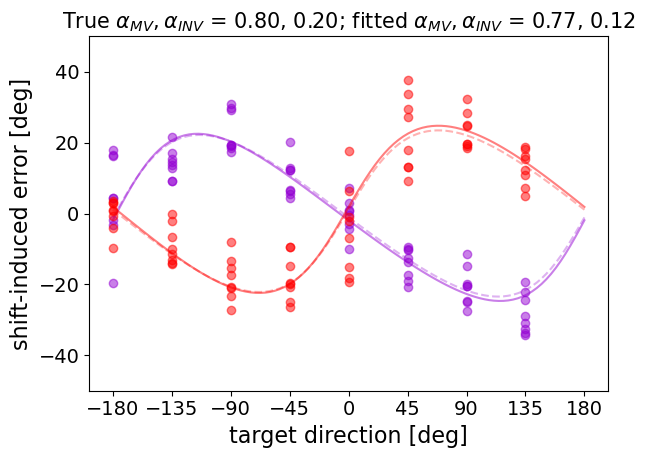

In [9]:
# Fit the velocity command model to the simulated data.

# First, import and define more helper functions.
from scipy.optimize import fmin_l_bfgs_b

# Define an objective function for fitting velocity model to data.
def calcModelError(aMV_and_aINV=array((0.5, 0.5)),
                   tgtRad=12, errAngleDF=None,
                   tgtOrigin=array((-15, 40)), L1=30, L2=30, ArmSign=+1):
    """Cost function for model fitting: Sum of squared residuals."""
    # NOTE This function is general enough to be used with any data set.
    #      For fitting, we will use a different function that only takes
    #      the model parameters as arguments; see optfun() below.
    # NOTE Returning the residuals instead of just the sum dramatically
    #      speeds up the optimization with scipy's least_squares() function.
    #      However, using L-BFGS-B is generally faster and more robust, and
    #      is fine with the sum over residuals.
    allSum = zeros(1)
    for ttype in ['CL', 'CR']:
        for tgtDeg, err_data in errAngleDF[ttype].groupby(level=0):
            tgtDir = deg2rad(tgtDeg)
            expect = justVeloModelErr(a_MV=aMV_and_aINV[0],
                                      a_INV=aMV_and_aINV[1],
                                      tgtDir=tgtDir,
                                      visShift=Ttype2VisShift[ttype],
                                      tgtRad=tgtRad, tgtOrigin=tgtOrigin,
                                      L1=L1, L2=L2, ArmSign=ArmSign)
            expect = chooseSmallerAngle(expect)
            deviat = square(array(err_data) - array(expect))
            allSum = allSum + deviat.sum()
    return allSum


def optfun(x):
    """
    Helper function needed for optimization.
    The optimization function will only vary the array of model parameters, x.
    All other parameters of calcModelError() are fixed.
    """
    return calcModelError(x, errAngleDF=fakeDF.errRads['fakeSubj'],
                          tgtOrigin=tgtOrigin, L1=L1, L2=L2, ArmSign=ArmSign)


# Call the optimization function to find the best fitting parameters.
# The function takes the objective function, the initial guess for the
# parameters, the bounds for the parameters, and a flag for whether to
# automatically approximate the gradient of the objective function.
# Here, both parameters are initialized at 0.5, and constrained between 0 and 1.
res = fmin_l_bfgs_b(optfun,
                    x0=(0.5, 0.5),
                    bounds=((0, 1), (0, 1)),
                    approx_grad=True)

# The resulting parameters are in the first element of the result object.
fit_aMV, fit_aINV = res[0][0], res[0][1]
print(f"Best fit at a_MV = {fit_aMV:.2f} and a_INV = {fit_aINV:.2f}.")

# There's more detailed information in the result object, like the
# function value at the minimum, the number of iterations, etc.
import pprint as pp
print("\nAll content of result object:")
pp.pprint(res)

# Finally, plot the simulated and the best fitting model.
yLims = (-50, 50)
figure()
for ttype in ['CL', 'CR']:
    plotVeloModelFun(a_MV=true_aMV, a_INV=true_aINV,
                     visShift=Ttype2VisShift[ttype], color=Color[ttype],
                     linestyle='-', alpha=.5,
                     tgtOrigin=tgtOrigin, L1=L1, L2=L2, ArmSign=ArmSign)
    plotVeloModelFun(a_MV=fit_aMV, a_INV=fit_aINV,
                     visShift=Ttype2VisShift[ttype], color=Color[ttype],
                     linestyle='--', alpha=.3,
                     tgtOrigin=tgtOrigin, L1=L1, L2=L2, ArmSign=ArmSign)
    tgtAngles = fakeDF.trgtRads['fakeSubj', ttype]
    errAngles = fakeDF.errRads['fakeSubj', ttype]
    tgtUnique = unique(tgtAngles)
    plot(rad2deg(tgtAngles),
         rad2deg(errAngles), 'o', color=Color[ttype], alpha=0.5)
title(r'True $\alpha_{MV}, \alpha_{INV}$ = %.2f, %.2f; '
      r'fitted $\alpha_{MV}, \alpha_{INV}$ = %.2f, %.2f' %
      (true_aMV, true_aINV, fit_aMV, fit_aINV), fontsize=15)
ylim(yLims)
xlabel('target direction [deg]', fontsize=16)
ylabel('shift-induced error [deg]', fontsize=16)
tight_layout()

# Referenzen

- Keyser, J. (2021).
  (Multi)sensory processing for planning and control of reaching movements [PhD Thesis, Radboud University Nijmegen].
  <https://repository.ubn.ru.nl/handle/2066/230609>
- Sober, S. J., & Sabes, P. N. (2003).
  Multisensory integration during motor planning.
  _The Journal of Neuroscience, 23_(18), 6982–6992.
  <http://www.jneurosci.org/content/23/18/6982.short>
- Sober, S. J., & Sabes, P. N. (2005).
  Flexible strategies for sensory integration during motor planning.
  _Nature Neuroscience, 8_(4), 490–497.
  <https://doi.org/10.1038/nn1427>
- Zhu, C., Byrd, R. H., Lu, P., & Nocedal, J. (1997).
  Algorithm 778: L-BFGS-B: Fortran subroutines for large-scale bound-constrained optimization.
  _ACM Transactions on Mathematical Software (TOMS), 23_(4), 550–560.

